In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

import yfinance as yf
import datetime as dt

In [32]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)

#preparando dados
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

predction_days = 60

future_day = 10


x_train, y_train = [], []

[*********************100%***********************]  1 of 1 completed


In [33]:
for x in range(predction_days, len(scaled_data)- future_day):
    x_train.append(scaled_data[x-predction_days: x, 0])
    y_train.append(scaled_data[x + future_day, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
#print(x_train, y_train)



In [34]:
#Neural network
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
81/81 [==============================] - 7s 39ms/step - loss: 0.0103
Epoch 2/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0041
Epoch 3/25
81/81 [==============================] - 3s 38ms/step - loss: 0.0040
Epoch 4/25
81/81 [==============================] - 3s 38ms/step - loss: 0.0037
Epoch 5/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0039
Epoch 6/25
81/81 [==============================] - 3s 38ms/step - loss: 0.0040
Epoch 7/25
81/81 [==============================] - 3s 38ms/step - loss: 0.0037
Epoch 8/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0036
Epoch 9/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0035
Epoch 10/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0034
Epoch 11/25
81/81 [==============================] - 3s 39ms/step - loss: 0.0035
Epoch 12/25
81/81 [==============================] - 3s 38ms/step - loss: 0.0033
Epoch 13/25
81/81 [==================

[*********************100%***********************]  1 of 1 completed
38/38 [==============================] - 1s 16ms/step


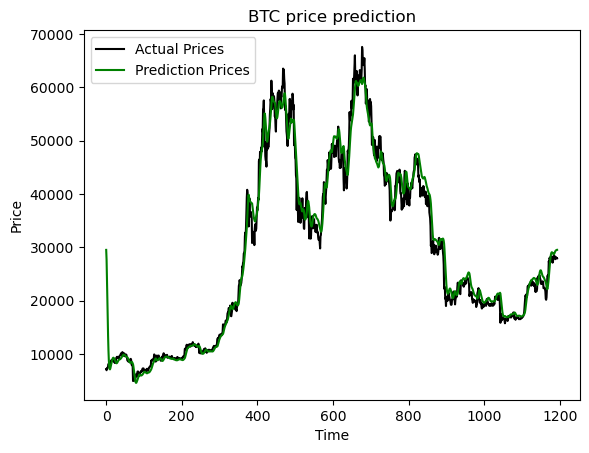

In [35]:
#testando
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(f'{crypto_currency}-{against_currency}', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - predction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(predction_days, len(model_inputs)):
    x_test.append(model_inputs[x-predction_days: x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc ='upper left')
plt.show()

In [36]:
#Predição
real_data = [model_inputs[len(model_inputs) + 1 - predction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)


1/1 [==============================] - 1s 844ms/step
[[29537.658]]
